In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.python.keras.callbacks import TensorBoard
from time import time
import matplotlib.pyplot as plt

In [2]:
spec_df = pd.read_csv("../resources/train_csv/full_dataset.csv")
back_df = pd.read_csv("../resources/train_csv/background_noise.csv")

In [3]:
columns = spec_df.columns.tolist()
back_df = back_df[columns]

In [6]:
spec_df = pd.concat((spec_df, back_df)).reset_index(drop=True)
del back_df

In [8]:
spec_df = spec_df.sample(frac=1)

In [9]:
labels = spec_df['labels'].values
labels = tf.keras.utils.to_categorical(labels) # one hot encode labels
spec_df.drop(labels="labels", axis='columns', inplace=True)
features = spec_df.values
features = features.reshape(-1, 129, 71, 1)

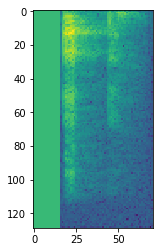

In [10]:
plt.imshow(features[0].reshape(129, 71))

In [11]:
tensorboard = TensorBoard(log_dir="logs/model_1_{}".format(time()))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), padding="same",
                                 activation='relu', kernel_initializer='he_normal', input_shape=(129, 71, 1)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), padding="same"))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), padding="same"))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(3, 3), padding="same"))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, strides=(1, 1),
                                 padding="same", activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2048, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(11, activation='softmax'))

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0003, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 129, 71, 64)       640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 129, 71, 64)       36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 43, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 43, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 43, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 8, 128)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 8, 256)        2

In [12]:
model.fit(x=features,
          y=labels,
          batch_size=128,
          epochs=15,
          validation_split=0.2,
          callbacks=[tensorboard])

Train on 20825 samples, validate on 5207 samples
Epoch 1/15
20825/20825 [==============================] - 113s 5ms/sample - loss: 2.8209 - accuracy: 0.1795 - val_loss: 1.9371 - val_accuracy: 0.3205
Epoch 2/15
20825/20825 [==============================] - 86s 4ms/sample - loss: 1.5816 - accuracy: 0.4106 - val_loss: 0.8752 - val_accuracy: 0.6566
Epoch 3/15
20825/20825 [==============================] - 86s 4ms/sample - loss: 0.7301 - accuracy: 0.7455 - val_loss: 0.3759 - val_accuracy: 0.8719
Epoch 4/15
20825/20825 [==============================] - 87s 4ms/sample - loss: 0.3762 - accuracy: 0.8796 - val_loss: 0.2603 - val_accuracy: 0.9155
Epoch 5/15
20825/20825 [==============================] - 87s 4ms/sample - loss: 0.2637 - accuracy: 0.9183 - val_loss: 0.2281 - val_accuracy: 0.9293
Epoch 6/15
20825/20825 [==============================] - 87s 4ms/sample - loss: 0.2295 - accuracy: 0.9305 - val_loss: 0.2391 - val_accuracy: 0.9249
Epoch 7/15
20825/20825 [==============================] 

In [13]:
model.save('saved_models/model_3.h5')